In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb

# Getting Data

In [2]:
#fetching the data
data=pd.read_csv('train_revised.csv')

FileNotFoundError: File b'train_revised.csv' does not exist

In [ ]:
#viewing the data from the first 5 rows
data.head()

In [4]:
#getting insights from our data
data.info()

data.describe() #getting statistical insights from our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


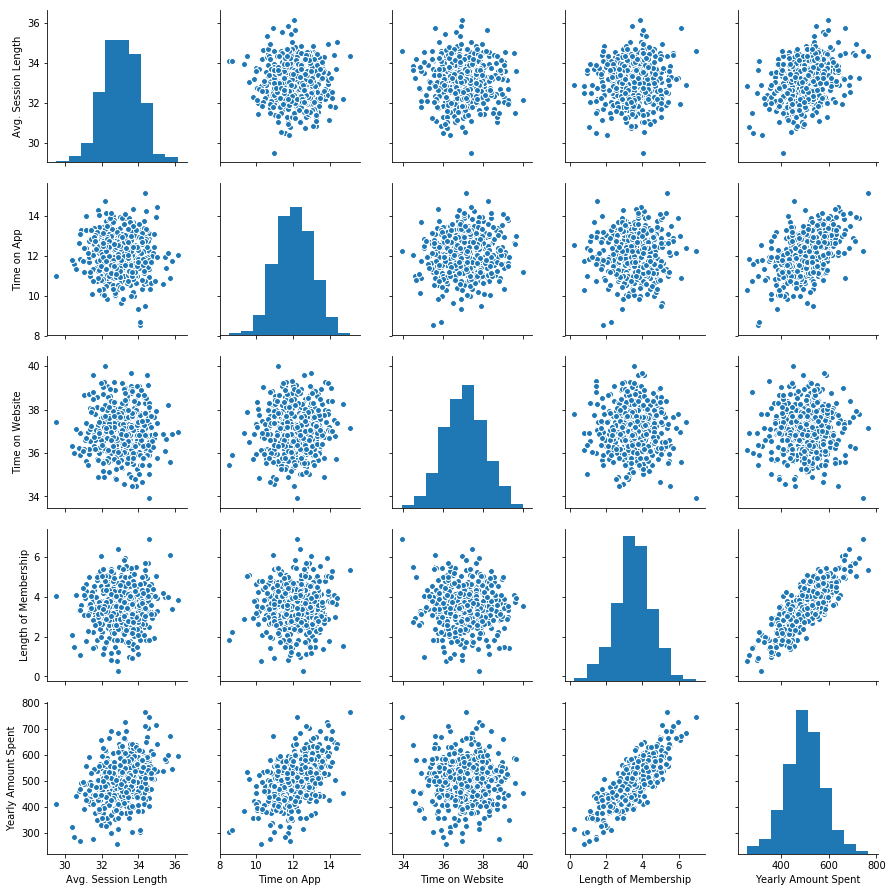

In [5]:
#checking correlation btwn the data 
snb.pairplot(data)

In [6]:
#checking distribution of what you are trying to predict
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

/home/gtechzilla/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


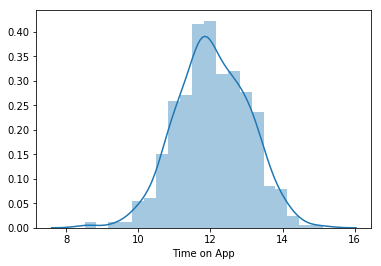

In [7]:
snb.distplot(data['Time on App'])

/home/gtechzilla/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


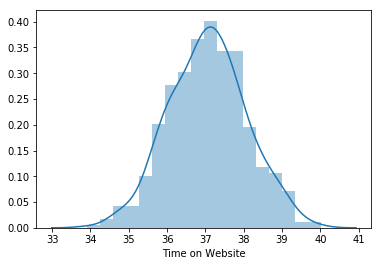

In [8]:
snb.distplot(data['Time on Website'])

In [48]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


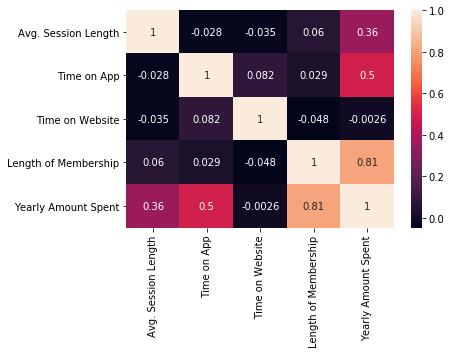

In [50]:
snb.heatmap(data.corr(),annot=True)

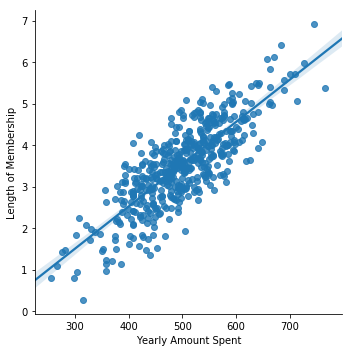

In [24]:
snb.lmplot(x='Yearly Amount Spent',
           y='Length of Membership',
           data=data)

In [26]:
X=data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=data['Yearly Amount Spent']

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(lm.intercept_)

-1061.016831742762


In [32]:
lm.coef_

array([26.15532441, 38.62008494,  0.31760347, 61.82039406])

In [33]:
X_train.columns


Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [34]:
 c_data=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [35]:
c_data

,Coeff
Avg. Session Length,26.155324
Time on App,38.620085
Time on Website,0.317603
Length of Membership,61.820394


In [36]:
predictions=lm.predict(X_test)

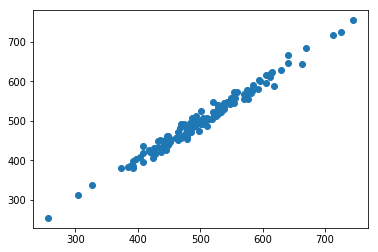

In [37]:
plt.scatter(y_test,predictions)

/home/gtechzilla/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


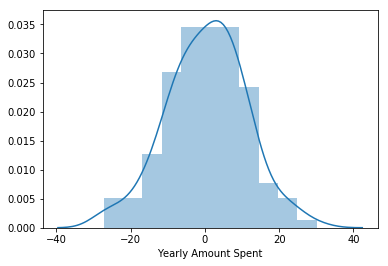

In [41]:
snb.distplot((y_test-predictions))


In [42]:
from sklearn import metrics

In [43]:
metrics.mean_absolute_error(y_test,predictions)

8.511790290966019

In [44]:
metrics.mean_squared_error(y_test,predictions)

114.37618082343678

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

10.694680024359625